# **IMPORT LIBRARYS**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats

# **DATA UNDERSTANDING**

In [69]:
df=pd.read_csv('social_media_usage.csv')
df.head(10)

,User_ID,Name,Age,Gender,Country,Platform,Daily_Usage_Hours,Posts_Per_Week,Followers_Count,Following_Count,Engagement_Rate,Preferred_Content_Type,Ad_Clicks_Per_Month,Account_Type,Last_Login
0,1,Cody Miller,55,Other,Zambia,Facebook,6.31,14,641683,3016,7.71,Reels,13,Business,2025-05-07
1,2,Christian Townsend,57,Female,Uganda,YouTube,3.92,9,561994,4339,0.40,Reels,48,Personal,2025-01-22
2,3,Mrs. Crystal Reyes,18,Female,Martinique,TikTok,7.12,15,3682,2393,16.98,Reels,9,Creator,2025-03-29
3,4,Mindy Miller,31,Other,Brazil,LinkedIn,7.64,3,728785,535,1.48,Reels,47,Business,2025-02-20
4,5,Wendy Miller,23,Other,Togo,Facebook,7.31,17,417444,1960,8.47,Stories,32,Creator,2025-05-25
5,6,James Woods,48,Male,Heard Island and McDonald Islands,Snapchat,6.14,24,417272,4731,2.35,Podcasts,18,Business,2025-08-26
6,7,George Turner,38,Female,Congo,YouTube,3.58,7,296729,2597,10.78,Stories,17,Personal,2025-08-20
7,8,Tommy Robertson,16,Female,French Polynesia,YouTube,5.84,10,568023,2364,10.11,Reels,25,Creator,2025-03-05
8,9,Connie Cortez,37,Other,Montserrat,Instagram,7.86,7,588549,429,18.23,Videos,43,Personal,2025-01-22
9,10,James Martin,25,Female,Bangladesh,Twitter,1.85,25,840026,373,1.14,Videos,21,Personal,2025-01-29


In [70]:
df.tail(10)

,User_ID,Name,Age,Gender,Country,Platform,Daily_Usage_Hours,Posts_Per_Week,Followers_Count,Following_Count,Engagement_Rate,Preferred_Content_Type,Ad_Clicks_Per_Month,Account_Type,Last_Login
990,991,Darren Buchanan,19,Male,Egypt,LinkedIn,0.84,4,306963,3349,0.23,Reels,49,Personal,2025-02-26
991,992,Barbara Crawford,19,Female,United States Virgin Islands,LinkedIn,6.89,3,995972,4523,19.05,Photos,40,Creator,2025-01-03
992,993,Brent Pacheco,38,Other,Palau,Snapchat,1.48,2,740313,921,2.53,Videos,38,Business,2025-06-02
993,994,Jose Lopez,36,Female,Taiwan,TikTok,3.06,1,580644,2473,17.00,Videos,37,Business,2025-09-17
994,995,Teresa Rivera,54,Male,Trinidad and Tobago,Twitter,5.45,17,415342,1587,8.37,Photos,40,Personal,2025-05-20
995,996,Katie Valenzuela,43,Other,Lesotho,Snapchat,2.87,18,804546,1680,17.00,Photos,11,Business,2025-02-16
996,997,Jessica Sanchez,17,Male,Ethiopia,Instagram,3.39,2,701252,288,11.74,Reels,43,Creator,2025-07-03
997,998,Amy Crosby,19,Female,Palestinian Territory,YouTube,3.46,17,389762,229,1.60,Articles,49,Creator,2025-03-21
998,999,Kimberly Powell,30,Male,Tunisia,Snapchat,2.09,13,542203,3168,5.25,Stories,16,Creator,2025-02-23
999,1000,Max Sullivan,51,Male,Dominica,LinkedIn,2.13,25,132488,2219,7.61,Stories,25,Personal,2025-09-05


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 1000 non-null   int64  
 1   Name                    1000 non-null   object 
 2   Age                     1000 non-null   int64  
 3   Gender                  1000 non-null   object 
 4   Country                 1000 non-null   object 
 5   Platform                1000 non-null   object 
 6   Daily_Usage_Hours       1000 non-null   float64
 7   Posts_Per_Week          1000 non-null   int64  
 8   Followers_Count         1000 non-null   int64  
 9   Following_Count         1000 non-null   int64  
 10  Engagement_Rate         1000 non-null   float64
 11  Preferred_Content_Type  1000 non-null   object 
 12  Ad_Clicks_Per_Month     1000 non-null   int64  
 13  Account_Type            1000 non-null   object 
 14  Last_Login              1000 non-null   o

In [72]:
df.isnull()

,User_ID,Name,Age,Gender,Country,Platform,Daily_Usage_Hours,Posts_Per_Week,Followers_Count,Following_Count,Engagement_Rate,Preferred_Content_Type,Ad_Clicks_Per_Month,Account_Type,Last_Login
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
df.isnull().sum()

,0
User_ID,0
Name,0
Age,0
Gender,0
Country,0
Platform,0
Daily_Usage_Hours,0
Posts_Per_Week,0
Followers_Count,0
Following_Count,0


In [74]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


# **STATISTICAL INFORMATION**

In [75]:
df.describe()

,User_ID,Age,Daily_Usage_Hours,Posts_Per_Week,Followers_Count,Following_Count,Engagement_Rate,Ad_Clicks_Per_Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,36.274000,4.164030,15.047000,497363.744000,2538.280000,9.697480,24.528000
std,288.819436,14.076614,2.074762,9.211821,285687.082833,1428.204241,5.673489,14.628301
min,1.000000,13.000000,0.510000,0.000000,868.000000,11.000000,0.160000,0.000000
25%,250.750000,24.000000,2.437500,7.000000,246354.750000,1306.500000,4.837500,12.000000
50%,500.500000,37.000000,4.080000,15.000000,496988.500000,2522.000000,9.440000,23.000000
75%,750.250000,49.000000,5.852500,24.000000,734886.750000,3745.750000,14.567500,38.000000
max,1000.000000,60.000000,7.990000,30.000000,998952.000000,4997.000000,19.970000,50.000000


# **ANALYSING & DATE VISUALIZATIONS**

,Daily_Usage_Hours
Platform,
Facebook,4.316471
Twitter,4.207778
LinkedIn,4.196331
TikTok,4.193286
YouTube,4.122449
Snapchat,4.087813
Instagram,4.011691


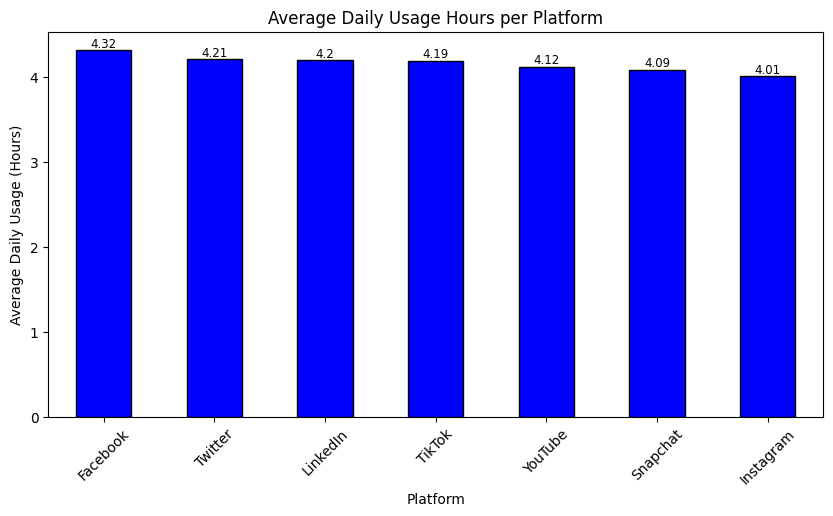

In [76]:
#Average Daily Usage Hours per Platform
avg_usage = df.groupby("Platform")["Daily_Usage_Hours"].mean().sort_values(ascending=False)
display(avg_usage)
plt.figure(figsize=(10,5))
ax = avg_usage.plot(kind="bar", color="blue", edgecolor="black")

for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0,
             round(yval, 2), ha="center", va="bottom", fontsize=8.5)

plt.title("Average Daily Usage Hours per Platform")
plt.xlabel("Platform")
plt.ylabel("Average Daily Usage (Hours)")
plt.xticks(rotation=45)
plt.show()

,Daily_Usage_Hours
Gender,
Female,1350.47
Male,1399.46
Other,1414.10


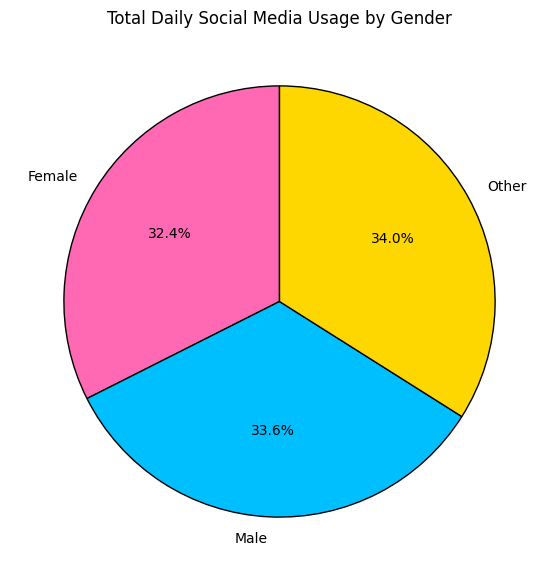

In [77]:
# Sum of total daily usage hours by gender
usage_gender = df.groupby("Gender")["Daily_Usage_Hours"].sum()
display(usage_gender)

colors = ["#FF69B4", "#00BFFF", "#FFD700"]

plt.figure(figsize=(7,7))
plt.pie(
    usage_gender,
    labels=usage_gender.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
        wedgeprops={"edgecolor":"black", "linewidth":1}
    )

plt.title("Total Daily Social Media Usage by Gender")
plt.show()

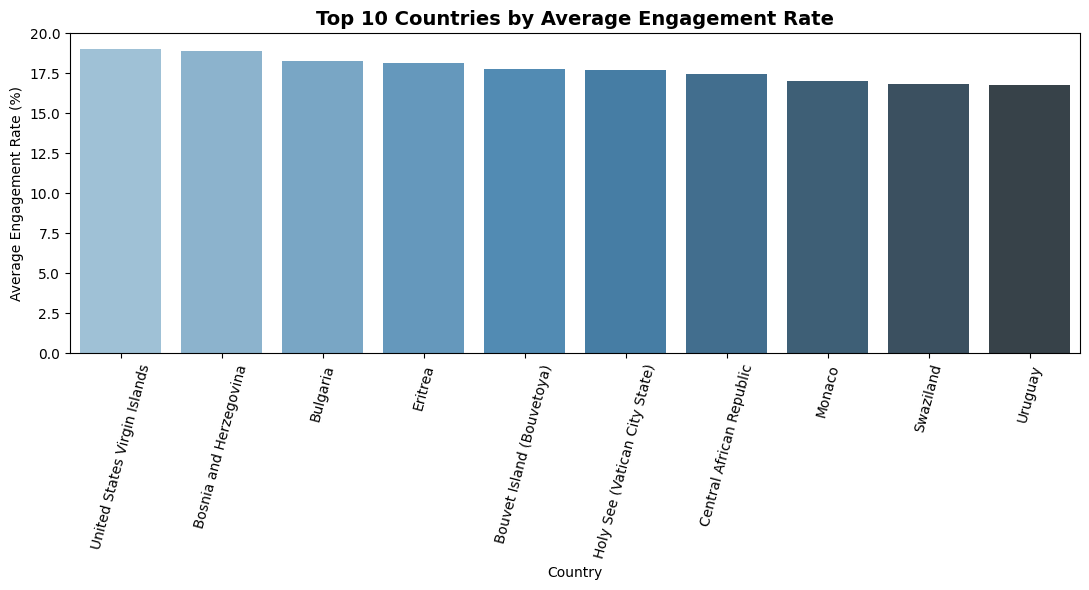

In [78]:
# Calculate average engagement rate by country
avg_engagement = df.groupby("Country")["Engagement_Rate"].mean().sort_values(ascending=False)

# Select top 15 countries
top_countries = avg_engagement.head(10).reset_index()

# Seaborn barplot
plt.figure(figsize=(11,6))
sns.barplot(
    data=top_countries,
    x="Country",
    y="Engagement_Rate",
    hue="Country",
    legend=False,
    palette="Blues_d"
)

plt.title("Top 10 Countries by Average Engagement Rate", fontsize=14, fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Average Engagement Rate (%)")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


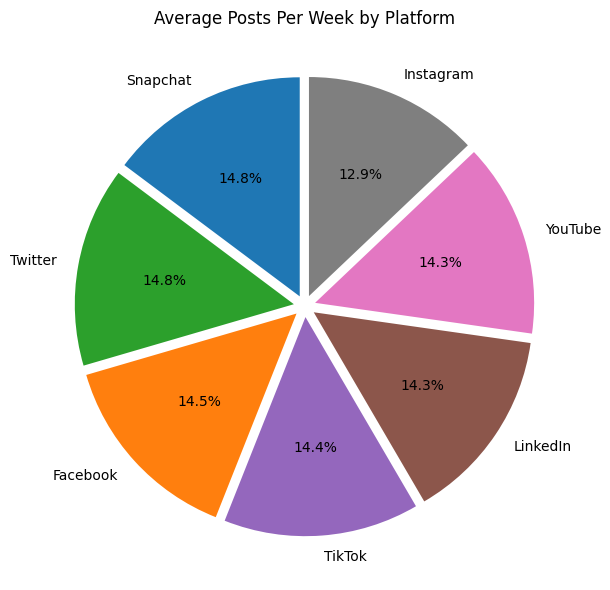

In [79]:
# Average posts per week by platform
avg_posts = df.groupby("Platform")["Posts_Per_Week"].mean().sort_values(ascending=False)

# Define custom dark colors
colors = ["#1f77b4", "#2ca02c", "#ff7f0e", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]

plt.figure(figsize=(8,6))
plt.pie(
    avg_posts,
    labels=avg_posts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
  explode=[0.05]*len(avg_posts)  # slice effect
)
plt.title("Average Posts Per Week by Platform")
plt.tight_layout()
plt.show()


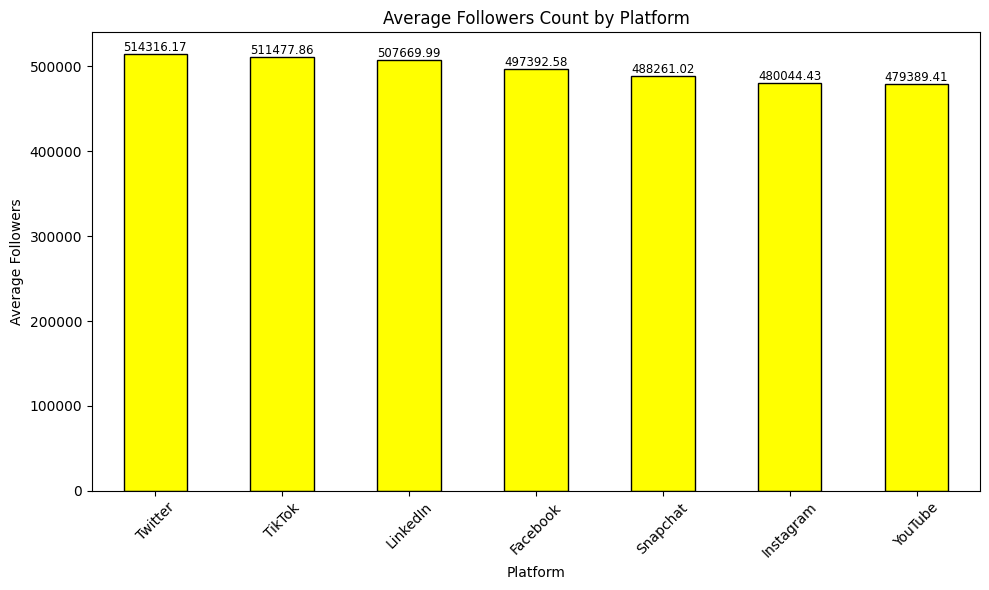

In [80]:
#  Average followers by platform
avg_followers_by_platform = df.groupby("Platform")["Followers_Count"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ax = avg_followers_by_platform.plot(kind='bar', color='yellow', edgecolor='black')


for bar in ax.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10,
            round(yval, 2), ha="center", va="bottom", fontsize=8.5)

plt.title("Average Followers Count by Platform")
plt.ylabel("Average Followers")
plt.xlabel("Platform")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


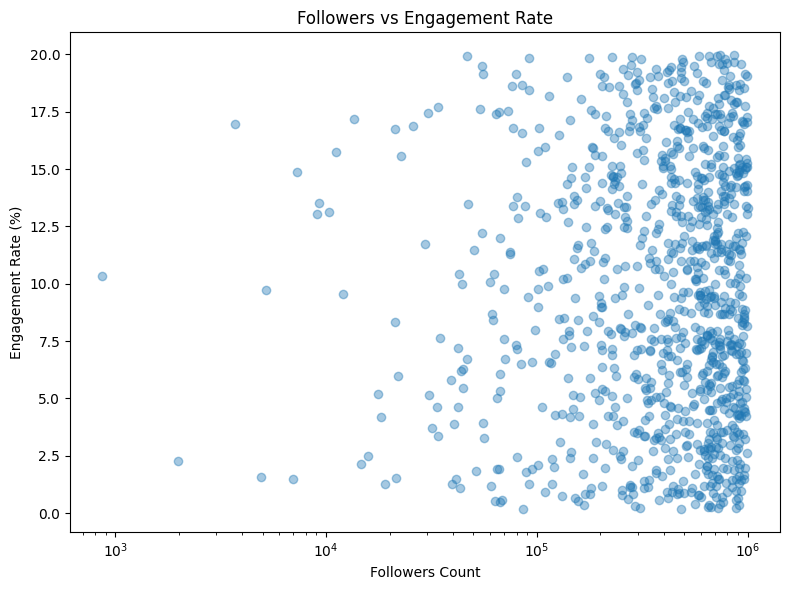

In [81]:
#Followers vs Engagement Rate
plt.figure(figsize=(8,6))
plt.scatter(df["Followers_Count"], df["Engagement_Rate"], alpha=0.4)
plt.title("Followers vs Engagement Rate")
plt.xlabel("Followers Count")
plt.ylabel("Engagement Rate (%)")
plt.xscale("log")
plt.tight_layout()
plt.show()

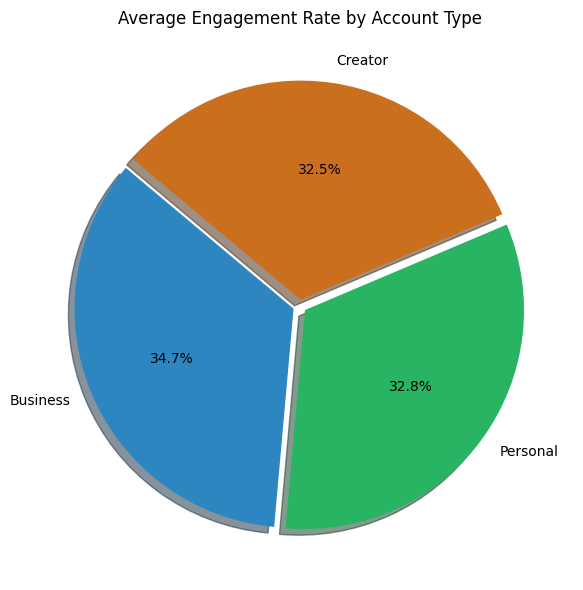

In [82]:
# Average engagement by account type - Pie Chart
avg_engagement_by_account_type = df.groupby("Account_Type")["Engagement_Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.pie(
    avg_engagement_by_account_type,
    labels=avg_engagement_by_account_type.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=["#2E86C1", "#28B463", "#CA6F1E"],  # Darker colors
    shadow=True,
    explode=[0.03]*len(avg_engagement_by_account_type)  # slice effect
)
plt.title("Average Engagement Rate by Account Type")
plt.tight_layout()
plt.show()


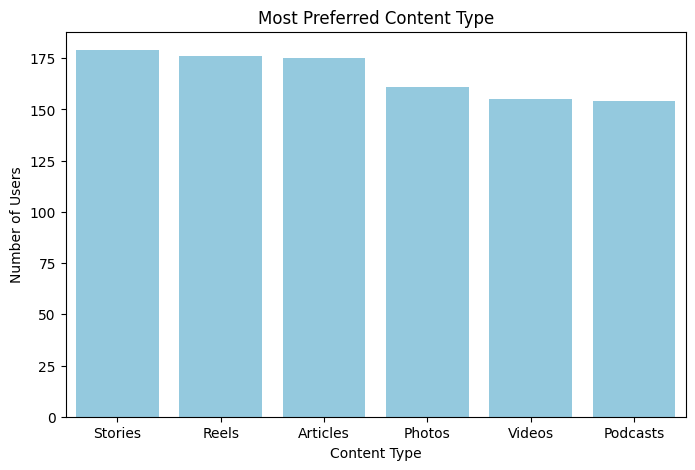

In [83]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="Preferred_Content_Type",
    order=df["Preferred_Content_Type"].value_counts().index,
    color="skyblue"   # single color (safe, no warning)
)
plt.title("Most Preferred Content Type")
plt.xlabel("Content Type")
plt.ylabel("Number of Users")
plt.show()


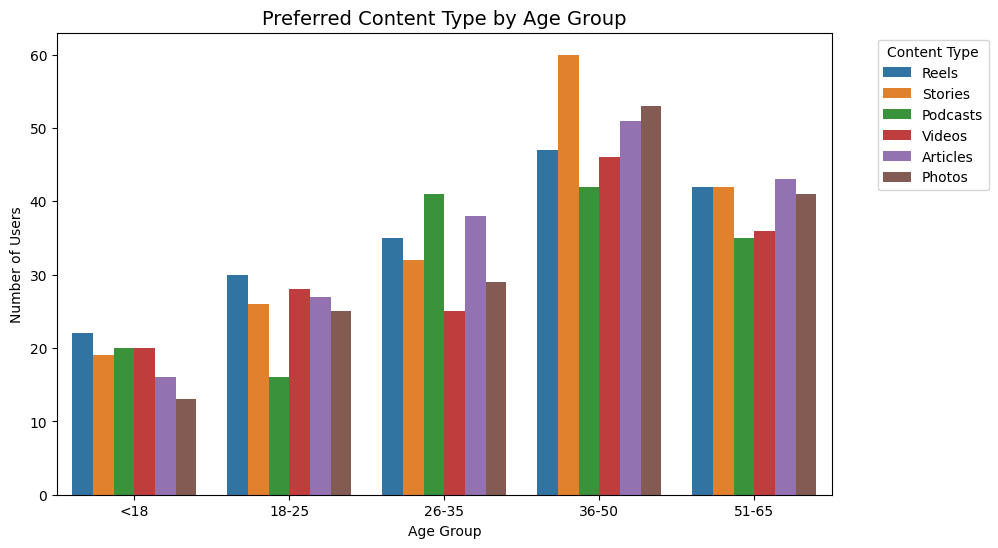

In [84]:
# Grouped bar chart for Preferred Content Type by Age Group

# Define age groups
bins = [0, 18, 25, 35, 50, 65]
labels = ["<18", "18-25", "26-35", "36-50", "51-65"]

# Create Age_Group column
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)


plt.figure(figsize=(10,6))
sns.countplot(data=df,
              x="Age_Group",
              hue="Preferred_Content_Type")

plt.title("Preferred Content Type by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.legend(title="Content Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

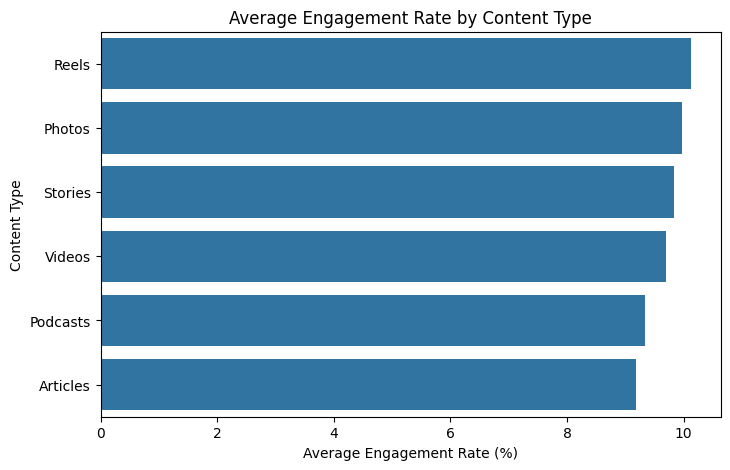

In [85]:
# Average engagement rate by content type
engagement_content = df.groupby("Preferred_Content_Type")["Engagement_Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(y=engagement_content.index, x=engagement_content.values)
plt.title("Average Engagement Rate by Content Type")
plt.xlabel("Average Engagement Rate (%)")
plt.ylabel("Content Type")
plt.show()

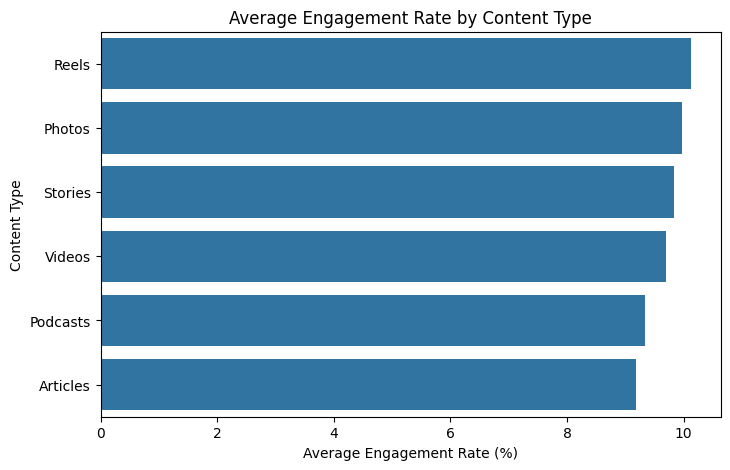

In [86]:
# Reload the original dataset
df = pd.read_csv('social_media_usage.csv')

# Average engagement rate by content type
engagement_content = df.groupby("Preferred_Content_Type")["Engagement_Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(y=engagement_content.index, x=engagement_content.values)
plt.title("Average Engagement Rate by Content Type")
plt.xlabel("Average Engagement Rate (%)")
plt.ylabel("Content Type")
plt.show()

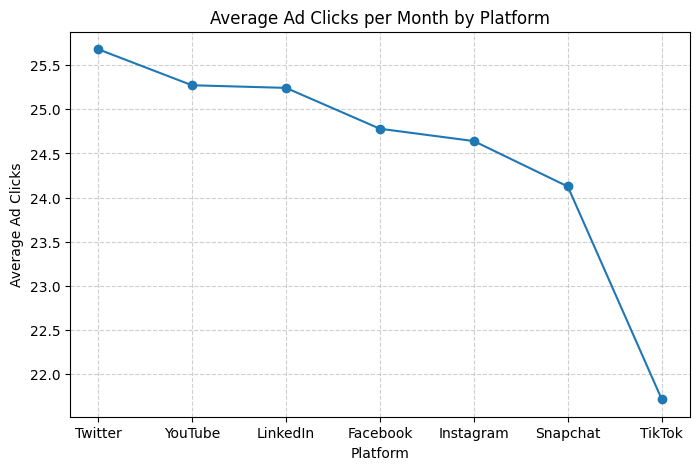

In [87]:
# Average ad clicks per month by platform
avg_ads_platform = df.groupby("Platform")["Ad_Clicks_Per_Month"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.plot(avg_ads_platform.index, avg_ads_platform.values, marker="o", linestyle="-")
plt.title("Average Ad Clicks per Month by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Ad Clicks")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

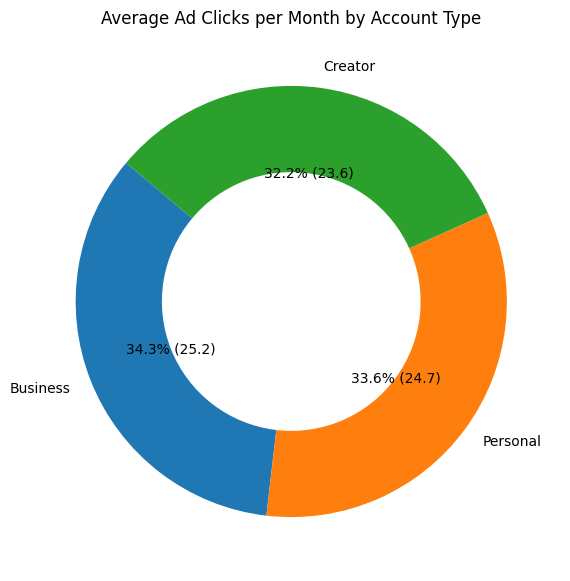

In [88]:
#  Group by Account Type
avg_ads_account = df.groupby("Account_Type")["Ad_Clicks_Per_Month"].mean().sort_values(ascending=False)

# Donut Chart
plt.figure(figsize=(7,7))
plt.pie(
    avg_ads_account.values,
    labels=avg_ads_account.index,
    autopct=lambda p: f'{p:.1f}% ({p*avg_ads_account.values.sum()/100:.1f})',
    startangle=140,
    wedgeprops={'width':0.4}
)

plt.title("Average Ad Clicks per Month by Account Type")
plt.show()


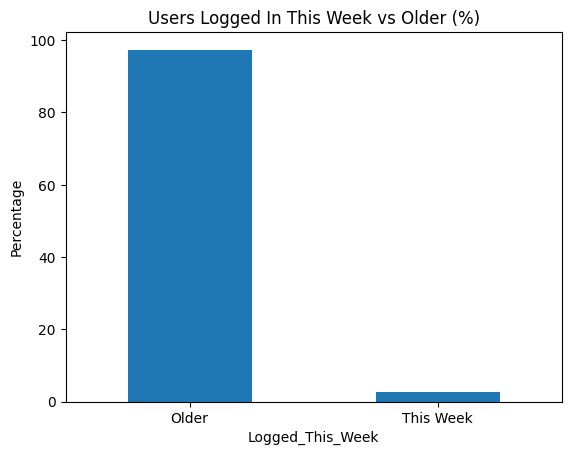

In [91]:
# Percentage of users logged in this week vs older dates
df["Last_Login"] = pd.to_datetime(df["Last_Login"])
today = pd.Timestamp.now().normalize() # Get today's date without time information
df["Logged_This_Week"] = df["Last_Login"] >= (today - pd.Timedelta(days=7))
login_percentage = df["Logged_This_Week"].value_counts(normalize=True) * 100

login_percentage.plot(kind="bar", title="Users Logged In This Week vs Older (%)")
plt.xticks(ticks=[0,1], labels=["Older", "This Week"], rotation=0)
plt.ylabel("Percentage")
plt.show()

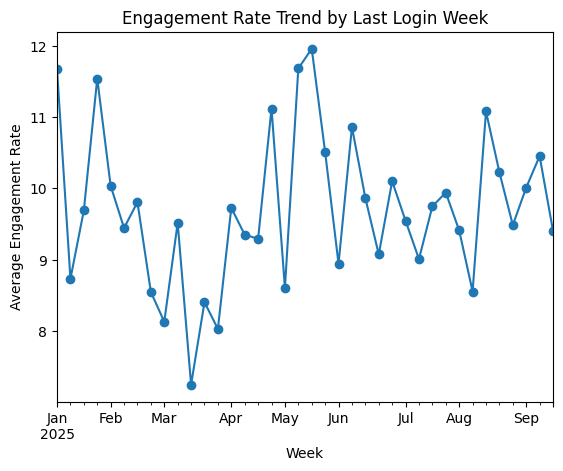

In [92]:
# Trend between last login date and engagement rate
engagement_trend = df.groupby(df["Last_Login"].dt.to_period("W"))["Engagement_Rate"].mean()

engagement_trend.plot(kind="line", marker="o", title="Engagement Rate Trend by Last Login Week")
plt.ylabel("Average Engagement Rate")
plt.xlabel("Week")
plt.show()

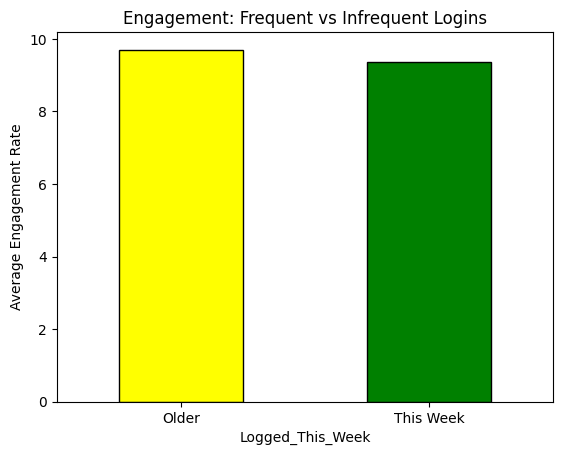

In [93]:
#  Frequent vs infrequent logins and engagement
engagement_comparison = df.groupby("Logged_This_Week")["Engagement_Rate"].mean()

engagement_comparison.plot(kind="bar", title="Engagement: Frequent vs Infrequent Logins",color= ['yellow', 'green'], edgecolor='black')
plt.ylabel("Average Engagement Rate")
plt.xticks(ticks=[0,1], labels=["Older", "This Week"], rotation=0)
plt.ylabel("Average Engagement Rate")
plt.show()


# **STATISTICAL TESTING**

In [ ]:
# Split data by Account Type
personal = df[df["Account_Type"] == "Personal"]["Ad_Clicks_Per_Month"]
business = df[df["Account_Type"] == "Business"]["Ad_Clicks_Per_Month"]
creator = df[df["Account_Type"] == "Creator"]["Ad_Clicks_Per_Month"]

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(personal, business, creator)

print("F-statistic:", f_stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis → At least one account type has different ad clicks.")
else:
    print("Fail to Reject Null Hypothesis → No significant difference in ad clicks across account types.")


In [ ]:
# Chi-square Test
#  Gender vs Preferred Content Type
contingency_table = pd.crosstab(df["Gender"], df["Preferred_Content_Type"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

if p < 0.05:
    print("✅ Reject Null Hypothesis: There is a significant relationship")
else:
    print("❌ Fail to Reject Null Hypothesis: No significant relationship")
